<a href="https://colab.research.google.com/github/Fisail/Fisail/blob/main/TP_Graphes_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Présentation du TP

Dans ce TP, l'objectif est d'implémenter les opérations simples sur les graphes orientés. 
La représentation choisie pour les graphes est une matrice d'adjacence, qui sera représentée par un tableau de tableau (les noms des sommets sont des entiers et seront numérotés en commençant à 0). Nous considérons que le nombre de sommets du graphe ne pourra pas être modifié une fois le graphe construit.

## Définition des fonctions pour l'affichage des graphes (code entièrement donné)

### Installation de graphviz pour pouvoir visualiser les graphes

In [1]:
%pip install graphviz
import graphviz
graphviz.__version__, graphviz.version()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


('0.20.1', (2, 43, 0))

### Création d'une fonction de conversion d'un graphe, défini par une matrice d'adjacence, vers le format graphviz

In [2]:
def creation_graphe_graphviz(g):
    # création d'un graphe orienté
    dot = graphviz.Digraph()
    
    # ajout des sommets
    for i in range(len(g)):
        dot.node(str(i))
    
    # ajout des arcs
    for i in range(len(g)):
        for j in range(len(g)):
            if g[i][j] == 1:
                dot.edge(str(i), str(j))
    
    return dot

### Création et affichage d'un premier graphe orienté


In [172]:
graphe1 = [[0,1,1],
          [1,0,1],
          [1,0,0]]

#### Affichage de la matrice

In [167]:
print(graphe1)

[[0, 1, 1], [1, 0, 1], [1, 0, 0]]


#### Création du graphe associé, au format graphviz, pour pouvoir faire l'affichage de la représentation sagittale du graphe

In [173]:
gdot1 = creation_graphe_graphviz(graphe1)
#print(gdot1.source)

#### Affichage de la représentation sagittale du graphe

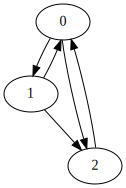

In [188]:
gdot1 

## Implémentation des premières fonctions pour manipuler les graphes (cellules de code à compléter)

#### `graphe_vide(n)`: fonction qui construit un graphe vide (sans arcs), avec `n` sommets, et qui retourne la matrice d'adjacence correspondante

In [6]:
def graphe_vide(n):
    g = []
    for i in range(n):
        l = []
        for j in range(n):
            l.append(0)
        g.append(l)
    return g

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


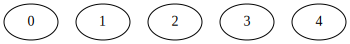

In [7]:
# test de la fonction graphe_vide
graphe2 = graphe_vide(5)
print(graphe2)
gdot2 = creation_graphe_graphviz(graphe2)
gdot2

#### `est_arc(g, i, j)` : fonction qui retourne vrai si l'arc `(i,j)` existe dans le graphe `g`

In [26]:
def est_arc(g, i, j):
    if g[i][j] == 1:
        return True
    return False


In [27]:
# test de la fonction est_arc
print(est_arc(graphe1, 0, 0))
print(est_arc(graphe1, 0, 1))

False
True


#### `ajoute_arc(g, i, j)` : fonction qui ajoute l'arc `(i,j)` au graphe `g`, s'il n'est pas déjà présent

In [29]:
def ajoute_arc(g, i, j):
    if not est_arc(g,i,j):
      g[i][j] = 1

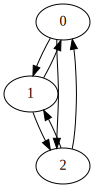

In [88]:
# test de la fonction ajoute_arc
ajoute_arc(graphe1, 2, 1)
gdot1 = creation_graphe_graphviz(graphe1)
gdot1

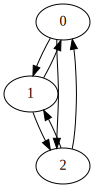

In [84]:
# test de la fonction ajoute_arc
ajoute_arc(graphe1, 2, 1)
gdot1 = creation_graphe_graphviz(graphe1)
gdot1

#### `ote_arc(g, i, j)`: fonction qui ote l'arc `(i,j)` du graphe `g`, s'il était déjà présent

In [95]:
def ote_arc(g, i, j):
    if est_arc(g,i,j):
      g[i][j] = 0

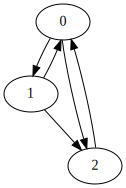

In [96]:
# test de la fonction ote_arc
ote_arc(graphe1, 2, 1)
gdot1 = creation_graphe_graphviz(graphe1)
gdot1

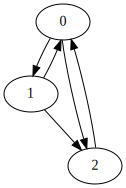

In [98]:
# test de la fonction ote_arc
ote_arc(graphe1, 1, 1)
gdot1 = creation_graphe_graphviz(graphe1)
gdot1

#### `nb_sommets(g)` : fonction qui retourne le nombre de sommets du graphe `g`

In [35]:
def nb_sommets(g):
    res = 0 
    for i in range(len(g)):
      res = res + 1
    return res 

In [36]:
# test de la fonction nb_sommets
n = nb_sommets(graphe1)
print("Nombre de sommets :", n)

Nombre de sommets : 3


#### `est_simple(g)` : fonction qui indique si le graphe `g` est simple

In [76]:
def est_simple(g):
    for i in range(len(g)):
      for j in range(len(g[i])):
        if i == j and g[i][j] == 1:
          return False
    return True

In [77]:
# test de la fonction est_simple
print("Graphe simple ?", est_simple(graphe1))

Graphe simple ? True


#### `est_complet(g)` : fonction qui indique si le graphe `g` est complet

In [78]:
def est_complet(g):
    nb_arretes = 0
    for i in range(len(g)):
      for j in range(len(g[i])):
        if g[i][j] == 1:
          nb_arretes = nb_arretes + 1
    
    print(nb_arretes)
    return (nb_arretes == (nb_sommets(g)*nb_sommets(g))-nb_sommets(g)) #Je soustrais par le nombre de sommets car on ne prend pas en compte les boucles pour cet exercice
    
    

In [79]:
# test de la fonction est_complet
print("Graphe complet ?", est_complet(graphe1))

5
Graphe complet ? False


#### `est_symetrique(g)` : fonction qui indique si le graphe `g` est symétrique

In [91]:
def est_symetrique(g):
    for i in range(len(g)):
      for j in range(len(g[i])):
        if g[i][j] != g[j][i]:
          return False
    return True

In [92]:
# test de la fonction est_symetrique
print("Graphe symétrique ?", est_symetrique(graphe1))

Graphe symétrique ? True


#### `degre_entrant(g, s)` : fonction qui retourne le degré entrant du sommet `s`, dans le graphe `g`

In [99]:
def degre_entrant(g, s):
    nb_precesseurs = 0 
    for i in range(len(g)):
      if i != s and g[i][s] == 1:
        nb_precesseurs = nb_precesseurs + 1 
    return nb_precesseurs

In [100]:
# test de la fonction degre_entrant
print("degré entrant du sommet 0 :", degre_entrant(graphe1,0))
print("degré entrant du sommet 1 :", degre_entrant(graphe1,1))
print("degré entrant du sommet 2 :", degre_entrant(graphe1,2))

degré entrant du sommet 0 : 2
degré entrant du sommet 1 : 1
degré entrant du sommet 2 : 2


#### `degre_sortant(g, s)` : fonction qui retourne le degré sortant du sommet `s`, dans le graphe `g`

In [103]:
def degre_sortant(g, s):
    nb_sucesseurs = 0
    for i in range(len(g)):
      if g[s][i] == 1:
        nb_sucesseurs = nb_sucesseurs + 1 
    return nb_sucesseurs

In [104]:
# test de la fonction degre_sortant
print("degré sortant du sommet 0 :", degre_sortant(graphe1,0))
print("degré sortant du sommet 1 :", degre_sortant(graphe1,1))
print("degré sortant du sommet 2 :", degre_sortant(graphe1,2))

degré sortant du sommet 0 : 2
degré sortant du sommet 1 : 2
degré sortant du sommet 2 : 1


#### `degre_total(g, s)` : fonction qui retourne le degré total du sommet `s`, dans le graphe `g`

In [105]:
def degre_total(g, s):
    return degre_entrant(g,s) + degre_sortant(g,s)

In [106]:
# test de la fonction degre_total
print("degré total du sommet 0 :", degre_total(graphe1,0))
print("degré total du sommet 1 :", degre_total(graphe1,1))
print("degré total du sommet 2 :", degre_total(graphe1,2))

degré total du sommet 0 : 4
degré total du sommet 1 : 3
degré total du sommet 2 : 3


#### `degres_entrants(g)` : fonction qui retourne les degrés entrants des sommets du graphe `g`, sous la forme d'une liste

In [109]:
def degres_entrants(g):
    degres = []
    for i in range(len(g)):
        degres.append(degre_entrant(g,i))
    return degres

In [110]:
# test de la fonction degres_entrants
print(degres_entrants(graphe1))

[2, 1, 2]


#### `degres_sortants(g)` : fonction qui retourne les degrés sortants des sommets du graphe `g`, sous la forme d'une liste

In [117]:
def degres_sortants(g):
    degres = []
    for i in range(len(g)):
        degres.append(degre_sortant(g,i))
    return degres

In [118]:
# test de la fonction degres_sortants
print(degres_sortants(graphe1))

[2, 2, 1]


#### `degres_totaux(g)` : fonction qui retourne les degrés totaux des sommets du graphe `g`, sous la forme d'une liste

In [113]:
def degres_totaux(g):
    return degres_entrants(g) + degres_sortants(g)

In [114]:
# test de la fonction degres_totaux
print(degres_totaux(graphe1))

[2, 1, 2, 2, 2, 1]


#### `successeurs(g,s)` : fonction qui retourne un tableau contenant les noms des sommets successeurs du sommet `s`, dans le graphe `g`

In [125]:
def successeurs(g,s):
    successeurs = []
    for i in range(len(g)):
        if g[s][i] == 1:
          successeurs.append(i)      
    return successeurs

In [126]:
# test de la fonction successeurs
print("Successeurs du sommet 0 :", successeurs(graphe1,0))
print("Successeurs du sommet 1 :", successeurs(graphe1,1))
print("Successeurs du sommet 2 :", successeurs(graphe1,2))

Successeurs du sommet 0 : [1, 2]
Successeurs du sommet 1 : [0, 2]
Successeurs du sommet 2 : [0]


#### `predecesseurs(g,s)` : fonction qui retourne un tableau contenant les noms des sommets prédécesseurs du sommet `s`, dans le graphe `g`

In [127]:
def predecesseurs(g,s):
    predecesseurs = []
    for i in range(len(g)):
      if i != s and g[i][s] == 1:
        predecesseurs.append(i)
    return predecesseurs

In [128]:
# test de la fonction predecesseurs
print("Prédécesseurs du sommet 0 :", predecesseurs(graphe1,0))
print("Prédécesseurs du sommet 1 :", predecesseurs(graphe1,1))
print("Prédécesseurs du sommet 2 :", predecesseurs(graphe1,2))

Prédécesseurs du sommet 0 : [1, 2]
Prédécesseurs du sommet 1 : [0]
Prédécesseurs du sommet 2 : [0, 1]


#### `graphe_reciproque(g)` : fonction qui retourne la matrice d'adjacence correspondant au graphe réciproque du graphe `g`

In [165]:
def graphe_reciproque(g):
    Graphe_vide = graphe_vide(nb_sommets(g))
    for i in range(len(g)):
        for j in range(len(g)):
            if g[i][j] == 1:
                Graphe_vide[j][i] = 1 #le but est de pouvoir inverser l'ordre des flèches
            elif g[i][j] == 0:
              Graphe_vide[j][i] = 0
            else : 
              continue
    return Graphe_vide
          

[[0, 1, 1], [1, 0, 1], [1, 0, 0]]
[[0, 1, 1], [1, 0, 0], [1, 1, 0]]


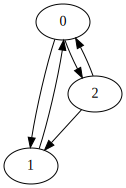

In [166]:
# test de la fonction graphe_reciproque
print(graphe1)
graphe1_rec = graphe_reciproque(graphe1)
print(graphe1_rec)
gdot1_rec = creation_graphe_graphviz(graphe1_rec)
gdot1_rec

#### `graphe_complementaire(g)` : fonction qui retourne la matrice d'adjacence correspondant au graphe complémentaire du graphe `g`

In [193]:
def graphe_complementaire(g): # A REVOIR
    Graphe_vide = graphe_vide(nb_sommets(g))
    for i in range(len(g)):
        for j in range(len(g)):
            if g[i][j] == 1:
                Graphe_vide[j][i] = 0 
            elif g[i][j] == 0:
              Graphe_vide[j][i] = 1
            else : 
              continue
    return Graphe_vide

[[0, 1, 1], [1, 0, 1], [1, 0, 0]]
[[1, 0, 0], [0, 1, 1], [0, 0, 1]]


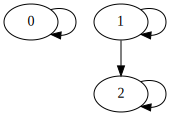

In [194]:
# test de la fonction graphe_complementaire
print(graphe1)

graphe1_comp = graphe_complementaire(graphe1)
print(graphe1_comp)
gdot1_comp = creation_graphe_graphviz(graphe1_comp)

gdot1_comp

#### `graphe_symetrique(g)` : fonction qui retourne la matrice d'adjacence correspondant au graphe symétrique du graphe `g`

In [201]:
def graphe_symetrique(g):
    Graphe_vide = graphe_vide(nb_sommets(g))
    for i in range(len(g)):
        for j in range(len(g)):
            if i != j  and g[i][j] == 0:
              Graphe_vide[j][i] = 1
            elif i == j and g[i][j] == 0:
                  Graphe_vide[j][i] = 0
            else : 
              Graphe_vide[j][i] = 1
    return Graphe_vide

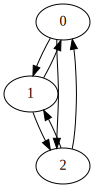

In [202]:
# test de la fonction graphe_symetrique
graphe1_sym = graphe_symetrique(graphe1)
#print(graphe1_rec)
gdot1_sym = creation_graphe_graphviz(graphe1_sym)
gdot1_sym

#### `est_chemin(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un chemin, dans le graphe `g`

In [338]:

def est_chemin(g, ls):

  if len(ls) == 0:
    return False

  index = 0
  while index != len(ls)-1:
    parcours = parcours_successeurs(g, ls[index],ls[index+1])
    if parcours == False:
      return False
    else :
      index = index + 1
  return True


#Cette fonction permet de parcourir les successeurs de sommet afin de voir si l'un des successeurs de sommet est égal à maybe_sucesseurs(l'élement à l'index suivant)
def parcours_successeurs(g, sommet, maybe_successeurs) : 
  tab_successeurs = successeurs(g, sommet)
  #print("succeseurs de", sommet, ":", tab_successeurs)
  for element in tab_successeurs:
    if element == maybe_successeurs:
      return True
  return False

In [327]:
# test de la fonction est_chemin
print("Chemin [] ?", est_chemin(graphe1,[]))
print("Chemin [1] ?", est_chemin(graphe1,[1]))
print("Chemin [0, 1] ?", est_chemin(graphe1,[0,1]))
print("Chemin [0, 1, 2] ?", est_chemin(graphe1,[0,1,2]))
print("Chemin [0, 2, 1] ?", est_chemin(graphe1,[0,2,1]))
print("Chemin [0, 1, 2, 2] ?", est_chemin(graphe1,[0,1,2,2]))
print("Circuit [0, 1, 2, 0,2, 1] ?", est_chemin(graphe1,[0,1,2,0,2, 1]))

Chemin [] ? False
Chemin [1] ? True
Chemin [0, 1] ? True
Chemin [0, 1, 2] ? True
Chemin [0, 2, 1] ? False
Chemin [0, 1, 2, 2] ? False
Circuit [0, 1, 2, 0,2, 1] ? False


#### `est_circuit(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un circuit, dans le graphe `g`

In [246]:
def est_circuit(g, ls):
    if est_chemin(g, ls) and ls[0] == ls[len(ls)-1]:
      return True
    return False

In [247]:
# test de la fonction est_circuit
print("Circuit [] ?", est_circuit(graphe1,[]))
print("Circuit [1] ?", est_circuit(graphe1,[1]))
print("Circuit [0, 1] ?", est_circuit(graphe1,[0,1]))
print("Circuit [0, 1, 2, 0] ?", est_circuit(graphe1,[0,1,2,0]))
print("Circuit [0, 2, 1, 0] ?", est_circuit(graphe1,[0,2,1,0]))
print("Circuit [0, 1, 2, 2] ?", est_circuit(graphe1,[0,1,2,2]))

Circuit [] ? False
Circuit [1] ? True
Circuit [0, 1] ? False
Circuit [0, 1, 2, 0] ? True
Circuit [0, 2, 1, 0] ? False
Circuit [0, 1, 2, 2] ? False


#### `est_chemin_elementaire(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un chemin élémentaire, dans le graphe `g`

In [346]:
def est_chemin_elementaire(g, ls):
    if not est_chemin(g, ls):
      return False
    
    list_trie = sorted(ls)
    for i in range(len(list_trie)-1):
      if list_trie[i] == list_trie[i+1]:
        return False
    return True

In [332]:
print("Circuit [] ?", est_chemin_elementaire(graphe1,[]))
print("Circuit [1] ?", est_chemin_elementaire(graphe1,[1]))
print("Circuit [0, 1] ?", est_chemin_elementaire(graphe1,[0,1]))
print("Circuit [0, 1, 2, 0] ?", est_chemin_elementaire(graphe1,[0,1,2,0]))
print("Circuit [0, 2, 1, 0] ?", est_chemin_elementaire(graphe1,[0,2,1,0]))
print("Circuit [0, 1, 2, 2] ?", est_chemin_elementaire(graphe1,[0,1,2,2]))

Circuit [] ? False
[1]
Circuit [1] ? True
[0, 1]
Circuit [0, 1] ? True
[0, 0, 1, 2]
llll
Circuit [0, 1, 2, 0] ? False
Circuit [0, 2, 1, 0] ? False
Circuit [0, 1, 2, 2] ? False


#### `est_chemin_simple(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un chemin simple, dans le graphe `g`

In [349]:
def est_chemin_simple(g, ls):
       return (est_chemin_elementaire(g, ls)) 
     



In [350]:
# test de la fonction est_chemin_simple
print("Circuit [] ?", est_chemin_simple(graphe1,[]))
print("Circuit [1] ?", est_chemin_simple(graphe1,[1]))
print("Circuit [0, 1] ?", est_chemin_simple(graphe1,[0,1]))
print("Circuit [0, 1, 2, 0] ?", est_chemin_simple(graphe1,[0,1,2,0]))
print("Circuit [0, 2, 1, 0] ?", est_chemin_simple(graphe1,[0,2,1,0]))
print("Circuit [0, 1, 2] ?", est_chemin_simple(graphe1,[0,1,2]))
print("Circuit [0, 1, 2, 0,2] ?", est_chemin_simple(graphe1,[0,1,2,0,2]))

Circuit [] ? False
Circuit [1] ? True
Circuit [0, 1] ? True
Circuit [0, 1, 2, 0] ? False
Circuit [0, 2, 1, 0] ? False
Circuit [0, 1, 2] ? True
Circuit [0, 1, 2, 0,2] ? False


#### `est_circuit_elementaire(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un circuit élémentaire, dans le graphe `g`

In [363]:
def est_circuit_elementaire(g, ls):
      if not est_circuit(g, ls):
        return False
    
      debut = ls[0]
      fin = ls[len(ls)-1]
      for i in range(1, len(ls)-1):
        if ls[i] == debut or ls[i] == fin :
          return False
      return True

In [369]:
print("Circuit [] ?", est_circuit_elementaire(graphe1,[]))
print("Circuit [1] ?", est_circuit_elementaire(graphe1,[1]))
print("Circuit [0, 1] ?", est_circuit_elementaire(graphe1,[0,1]))
print("Circuit [0, 1, 2, 0] ?", est_circuit_elementaire(graphe1,[0,1,2,0]))
print("Circuit [0, 2, 1, 0] ?", est_circuit_elementaire(graphe1,[0,2,1,0]))
print("Circuit [0, 1, 2,0,2] ?", est_circuit_elementaire(graphe1,[0,1,2,0,2]))
print("Circuit [0, 1, 2] ?", est_circuit_elementaire(graphe1,[0,1,2]))

Circuit [] ? False
Circuit [1] ? True
Circuit [0, 1] ? False
Circuit [0, 1, 2, 0] ? True
Circuit [0, 2, 1, 0] ? False
Circuit [0, 1, 2,0,2] ? False
Circuit [0, 1, 2] ? False


#### `est_circuit_simple(g, ls)` : fonction qui indique si la liste des sommets `ls` correspond à un circuit simple, dans le graphe `g`

In [365]:
def est_circuit_simple(g, ls):
    return (est_circuit_elementaire(g, ls)) 

In [370]:
#test de la fonction est_circuit_simple
print("Circuit [] ?", est_circuit_simple(graphe1,[]))
print("Circuit [1] ?", est_circuit_simple(graphe1,[1]))
print("Circuit [0, 1] ?", est_circuit_simple(graphe1,[0,1]))
print("Circuit [0, 1, 2, 0] ?", est_circuit_simple(graphe1,[0,1,2,0]))
print("Circuit [0, 2, 1, 0] ?", est_circuit_simple(graphe1,[0,2,1,0]))
print("Circuit [0, 1, 2] ?", est_circuit_simple(graphe1,[0,1,2]))
print("Circuit [0, 1, 2, 0,2] ?", est_circuit_simple(graphe1,[0,1,2,0,2]))

Circuit [] ? False
Circuit [1] ? True
Circuit [0, 1] ? False
Circuit [0, 1, 2, 0] ? True
Circuit [0, 2, 1, 0] ? False
Circuit [0, 1, 2] ? False
Circuit [0, 1, 2, 0,2] ? False


#### `est_source(g, s)` : fonction qui retourne vrai si le sommet `s` est une source, dans le graphe `g`

In [271]:
def est_source(g, s):
    return (len(predecesseurs(g,s)) == 0) #Si la longueur de la liste de precesseur = 0 alors on renvoit true (simplification de l'écriture)
      

In [272]:
# test de la fonction est_source
print("Est_Source sommet 0 ? :", est_source(graphe1,0))
print("Est_Source sommet 1 ? :", est_source(graphe1,1))
print("Est_Source sommet 2 ?:", est_source(graphe1,2))

Est_Source sommet 0 ? : False
Est_Source sommet 1 ? : False
Est_Source sommet 2 ?: False


#### `est_puits(g, s)` : fonction qui retourne vrai si le sommet `s` est un puits, dans le graphe `g`

In [273]:
def est_puits(g, s):
     return (len(successeurs(g,s)) == 0)

In [274]:
# test de la fonction est_puits
print("Est_Puit sommet 0 ? :", est_puits(graphe1,0))
print("Est_Puit sommet 1 ? :", est_puits(graphe1,1))
print("Est_Puit sommet 2 ?:", est_puits(graphe1,2))

Est_Puit sommet 0 ? : False
Est_Puit sommet 1 ? : False
Est_Puit sommet 2 ?: False


## Implémentation des fonctions bonus (cellules de code à compléter)

#### `representation_par_liste_successeurs(g)` : fonction qui retourne la représentation du graphe par liste des successeurs (sous forme de liste de listes)

In [ ]:
def representation_par_liste_successeurs(g):
    raise NotImplementedError

In [ ]:
# test de la fonction representation_par_liste_successeurs

#### `est_sous_graphe(g1, g2)` : fonction qui retourne vrai si le graphe `g2` est un sous-graphe du graphe `g1` (`g1` et `g2` doivent avoir le même nombre de sommets)

In [ ]:
def est_sous_graphe(g1, g2):
    raise NotImplementedError

In [ ]:
# test de la fonction est_sous_graphe

#### `sous_graphe(g, ls)` : fonction qui retourne le sous-graphe induit par la liste de sommets donnée (le sous-graphe induit n'aura plus la même numérotation des sommets, s'il en a moins que `g`)

In [ ]:
def sous_graphe(g, ls):
    raise NotImplementedError

In [ ]:
# test de la fonction sous_graphe